In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('rain_to_snow.csv')
data.head()

,Temperature,dTemperature,Snowfall
0,2.0,1.0,0.72
1,-1.0,2.0,7.20
2,-4.5,1.5,10.80
3,-8.0,1.0,14.40
4,-11.0,1.0,21.60


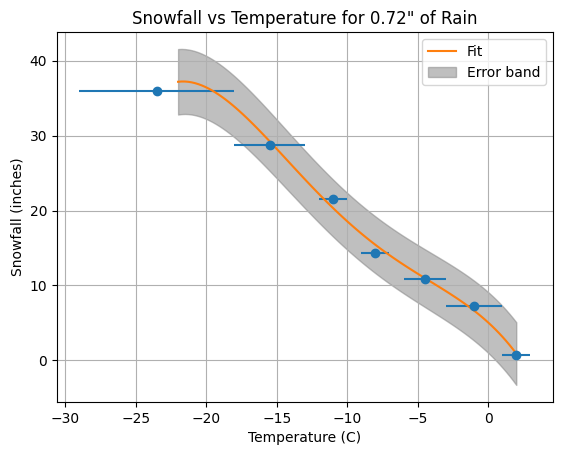

In [10]:
# Plot the data with error bars
yerror = np.zeros(len(data['Temperature']))
plt.errorbar(data['Temperature'], data['Snowfall'], xerr=data['dTemperature'], yerr=yerror, fmt='o')
plt.xlabel('Temperature (C)')
plt.ylabel('Snowfall (inches)')
plt.title('Snowfall vs Temperature for 0.72" of Rain')

# Fit a line to the data using curve_fit
from scipy.optimize import curve_fit
def fourth_order(x, a1, a2, a3, a4, a5):
    return a1 + a2*x + a3*x**2 + a4*x**3 + a5*x**4

# fit with curve_fit
popt, pcov = curve_fit(fourth_order, data['Temperature'], data['Snowfall'])

# Plot the fit
x = np.linspace(-22, 2, 100)
y = fourth_order(x, *popt)
plt.plot(x, y, label='Fit')

# Calculate an error band for the fit
yfit = fourth_order(data['Temperature'], *popt)
residuals = data['Snowfall'] - yfit
squared_residuals = residuals**2
chi2 = np.sum(squared_residuals)
dof = len(data['Temperature']) - 5
rmse = np.sqrt(chi2 / dof)
t = 2.776
x = np.linspace(-22, 2, 100)
y = fourth_order(x, *popt)
yerr = t * rmse * np.sqrt(1 + 1/len(data['Temperature']) + (x - np.mean(data['Temperature']))**2 / np.sum((data['Temperature'] - np.mean(data['Temperature']))**2))

plt.fill_between(x, y - yerr, y + yerr, color='gray', alpha=0.5, label='Error band')

# Add a legend
plt.legend()

# Add a grid
plt.grid()